<a href="https://colab.research.google.com/github/kimdonggyu2008/audio_deeplearning_python/blob/main/%EC%98%A4%EB%94%94%EC%98%A4_%EC%9A%94%EC%86%8C_%EC%B6%94%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_FOLDER="/content/drive/MyDrive/오디오_딥러닝_파이썬/data/"
file="blues.00000.wav"


In [ ]:
signal, sample_rate=librosa.load(BASE_FOLDER+file,sr=22050)

Text(0.5, 1.0, 'waveform')

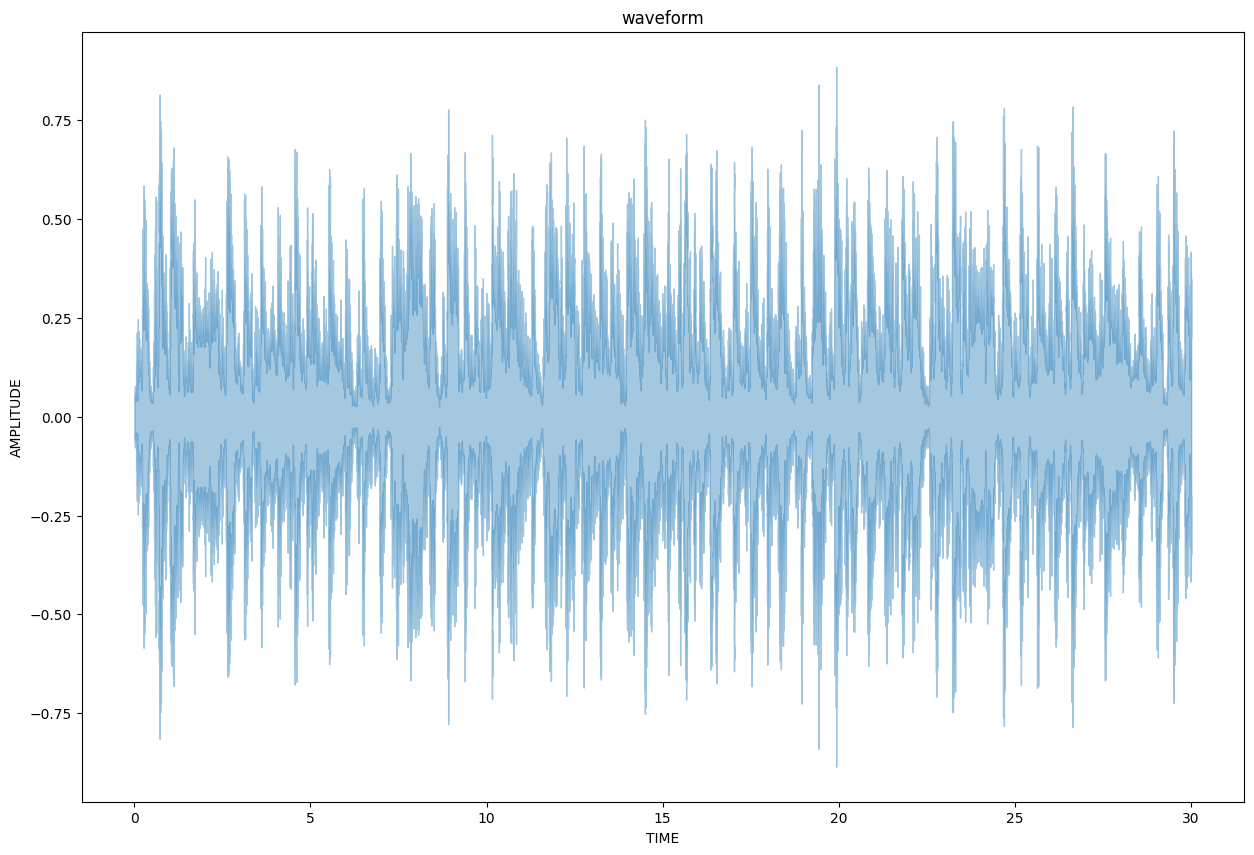

In [ ]:
FIG_SIZE=(15,10)
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal,alpha=0.4)
plt.xlabel("TIME")
plt.ylabel("AMPLITUDE")
plt.title("waveform")

Text(0.5, 1.0, 'power spectrum')

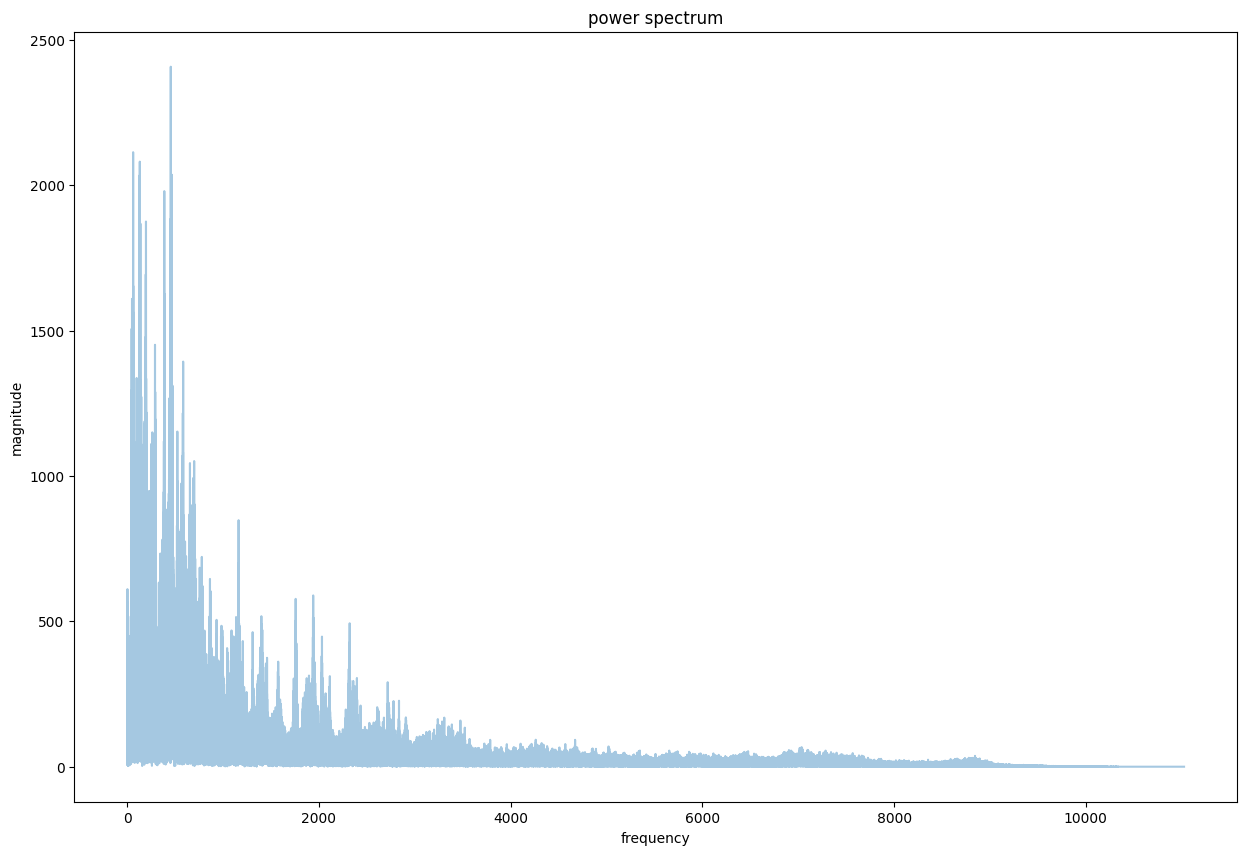

In [ ]:
fft=np.fft.fft(signal)
spectrum=np.abs(fft)
f=np.linspace(0,sample_rate,len(spectrum))

left_spectrum=spectrum[:int(len(spectrum)/2)]
left_f=f[:int(len(spectrum)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f,left_spectrum,alpha=0.4)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.title('power spectrum')

In [ ]:
hop_length=512
n_fft=2048

hop_length_duration=float(hop_length)/sample_rate
n_fft_duration=float(n_fft)/sample_rate
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'spectrogram')

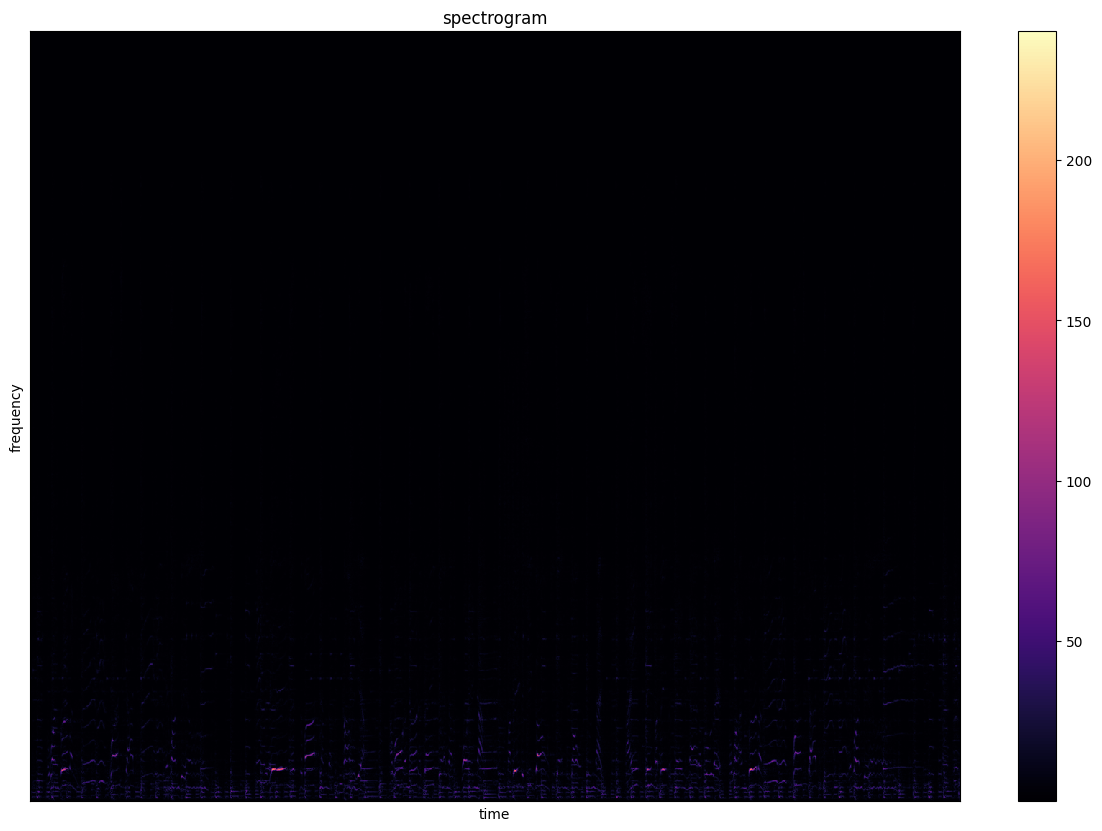

In [ ]:
stft=librosa.stft(signal,n_fft=n_fft,hop_length=hop_length)

spectrogram=np.abs(stft)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram,sr=sample_rate,hop_length=hop_length)

plt.xlabel("time")
plt.ylabel("frequency")
plt.colorbar()
plt.title("spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

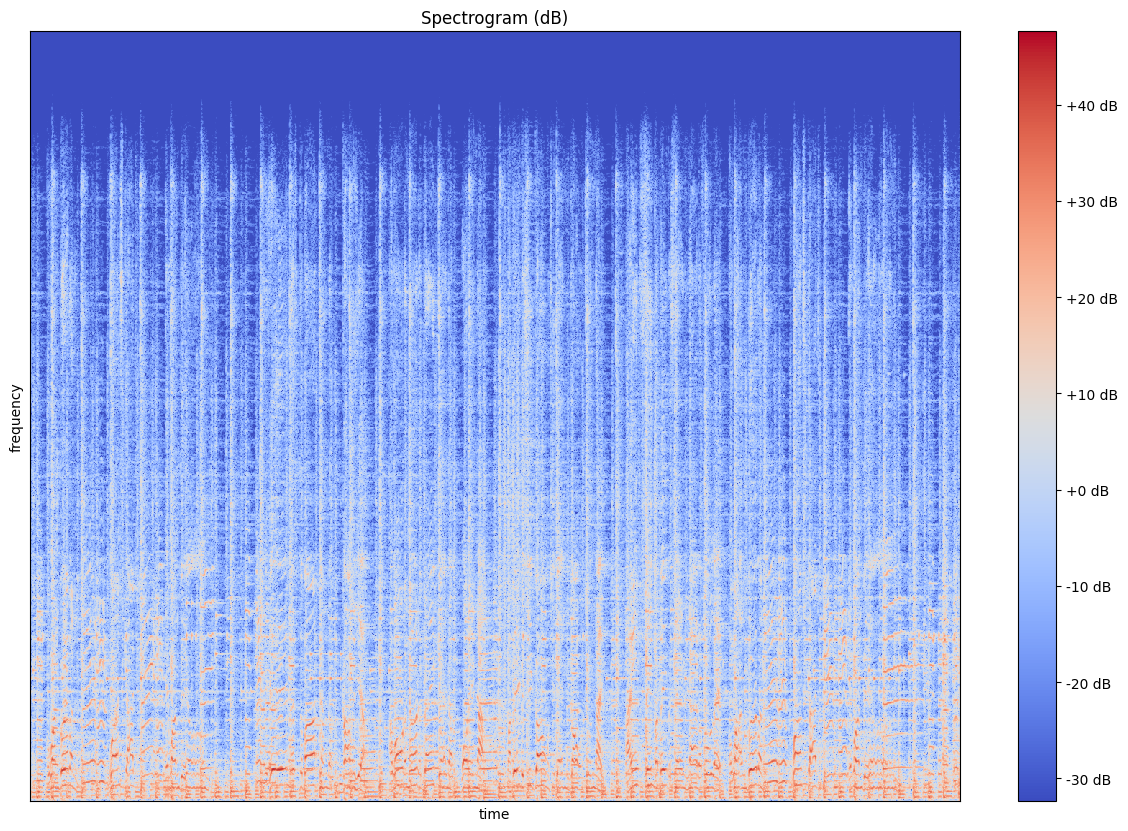

In [ ]:
log_spectrogram=librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram,sr=sample_rate,hop_length=hop_length)
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

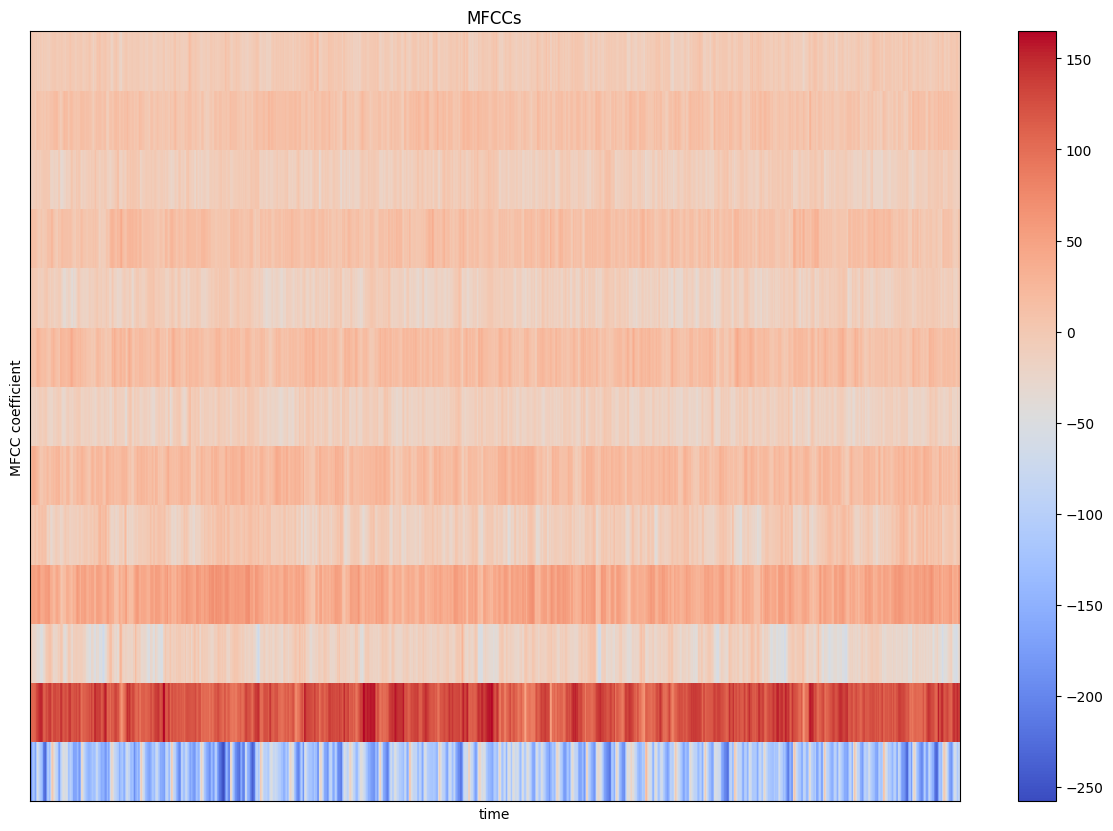

In [ ]:
MFCCs=librosa.feature.mfcc(y=signal,n_mfcc=13,sr=sample_rate)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs,sr=sample_rate,hop_length=hop_length)
plt.xlabel('time')
plt.ylabel('MFCC coefficient')
plt.colorbar()
plt.title('MFCCs')

plt.show()